<a href="https://colab.research.google.com/github/ibribr/ML/blob/master/KMC_IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IRIS-KMC (unsupervised)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

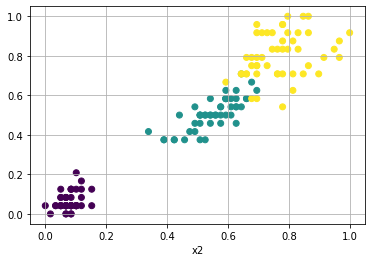

In [2]:
# load iris data
x = load_iris().data[:,[2,3]]
y = load_iris().target

scaler = MinMaxScaler()
x = scaler.fit_transform(x)

plt.figure()
plt.scatter(x[:,0], x[:,1], c=y)
plt.grid()
plt.xlabel('x1')
plt.xlabel('x2')
plt.show()

xtrain, xtest, ytrain, ytest = train_test_split(x,y, stratify=y, test_size=0.30, random_state=42)

In [8]:
#Create KMC Classifier
kmeans = KMeans(n_clusters=3, max_iter=1200, algorithm = 'auto', random_state=7)

#Train the model using the training sets
kmeans.fit(xtrain)
centroids = kmeans.cluster_centers_

#Predict the response for test dataset
ypred = kmeans.predict(xtest)
print(ypred[0,])
print(ytest[0,])

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(ytest, ypred))
print('centroids:\n', centroids)

2
2
Accuracy: 0.9111111111111111
centroids:
 [[0.08232446 0.05833333]
 [0.5496368  0.5       ]
 [0.78401937 0.82380952]]


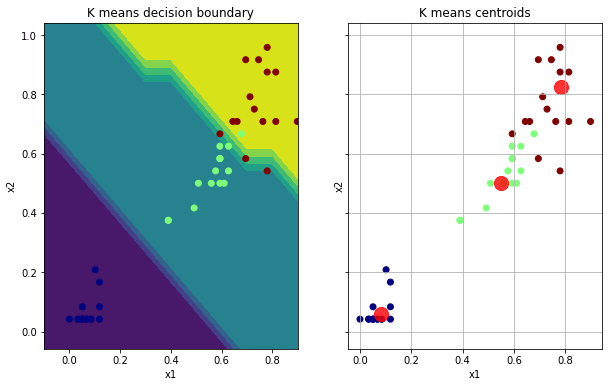

In [25]:
# plot decision boundary
x1 = np.arange(xtest[:,0].min()-0.1, xtest[:,0].max()+0.1, 0.1)
x2 = np.arange(xtest[:,1].min()-0.1, xtest[:,1].max()+0.1, 0.1)
x1g, x2g = np.meshgrid(x1, x2)
z = kmeans.predict(np.array([x1g.flatten(), x2g.flatten()]).T)

fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(10,6))
ax1.set_title('K means decision boundary')
ax1.contourf(x1g, x2g, z.reshape(x1g.shape))

#plot the scatter plot of the dataset
ax1.scatter(xtest[:,0],xtest[:,1], c=ytest, cmap=cm.jet)
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')

#plot the scatter plot of the dataset
ax2.set_title('K means centroids')
ax2.scatter(xtest[:,0],xtest[:,1], c=ytest, cmap=cm.jet)
ax2.scatter(centroids[:,0],centroids[:,1], s=200, c= 'red', alpha=0.8)
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.grid()

plt.show()